In [128]:
import numpy as np

In [129]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:,:2]
y = data[:,2].reshape(y.shape[0],1)

In [130]:
import plotData
import importlib
importlib.reload(plotData)

<module 'plotData' from '/Users/carioca/Dvlpt/prj/python/PyLearning/ang/Week3/exercise/plotData.py'>

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


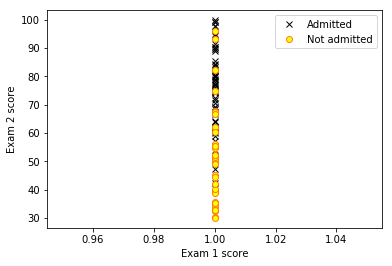

In [513]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')
plotData.plotData(X, y)

In [132]:
m,n = X.shape
X = np.append(np.ones(m).reshape(m,1), X, axis=1)
initial_theta = np.zeros(n+1).reshape(n+1,1)

In [184]:
import costFunction
import gradientFunction

In [189]:
importlib.reload(costFunction)
importlib.reload(gradientFunction)

<module 'gradientFunction' from '/Users/carioca/Dvlpt/prj/python/PyLearning/ang/Week3/exercise/gradientFunction.py'>

In [191]:
cost = costFunction.costFunction(X, y, initial_theta)
grad = gradientFunction.gradFunction(X, y, initial_theta)
print('Cost at initial theta (zeros): %f' %cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros):');
print(grad);
print('\nExpected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [192]:
test_theta = np.array([-24, .2, .2]).reshape(X.shape[1],1)
cost = costFunction.costFunction(X, y, test_theta)
grad = gradientFunction.gradFunction(X, y, test_theta)
print('Cost at test theta (zeros): %f' %cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at initial theta (zeros):');
print(grad);
print('\nExpected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at test theta (zeros): 0.218330
Expected cost (approx): 0.218

Gradient at initial theta (zeros):
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]

Expected gradients (approx):
 0.043
 2.566
 2.647



In [182]:
from scipy import optimize

In [511]:
import ex2_functions
importlib.reload(ex2_functions)
def redCostFunction(theta):
    return ex2_functions.costFunction(X, y, theta)
    #m = y.size
    #J = -(y*np.log(ex2_functions.sigmoidFunction(X, theta)) + (1-y)*np.log(1e-15+1-ex2_functions.sigmoidFunction(X, theta))).sum()/m
    #return J

def redGradFunction(theta):
    #m = y.size
    #grad = np.zeros(theta.size)
    #grad0 = (X[:,0].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #grad1 = (X[:,1].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #grad2 = (X[:,2].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #return  np.asarray((grad0, grad1, grad2))
    return ex2_functions.gradFunction(X, y, theta).flatten()

In [407]:
result = 0
result = optimize.fmin_cg(redCostFunction, initial_theta, fprime=redGradFunction, maxiter=400, full_output=True, gtol=1e-20)

         Current function value: 0.203498
         Iterations: 105
         Function evaluations: 306
         Gradient evaluations: 294


In [420]:
print('Cost at theta found by fminunc: %.4f\n' %result[1]);
print('Expected cost (approx): 0.203');
print('theta: ');
print(result[0]);
print('Expected theta (approx):');
print(' -25.161\n 0.206\n 0.201\n');


Cost at theta found by fminunc: 0.2035

Expected cost (approx): 0.203
theta: 
[-25.16130213   0.20623146   0.20147135]
Expected theta (approx):
 -25.161
 0.206
 0.201



In [430]:
import plotDecisionBoundary
importlib.reload(plotDecisionBoundary)

<module 'plotDecisionBoundary' from '/Users/carioca/Dvlpt/prj/python/PyLearning/ang/Week3/exercise/plotDecisionBoundary.py'>

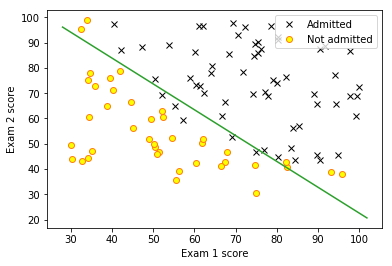

In [514]:
plotDecisionBoundary.plotData(X, y, result[0])

In [509]:
prob = ex2_functions.sigmoidFunction(np.array([1,45,85]), result[0]).sum()
print('For a student with scores 45 and 85, we predict an admission probability of %f' %prob);
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.776290
Expected value: 0.775 +/- 0.002


In [512]:
p = ex2_functions.predict(X, result[0])
print('Train Accuracy: %.2f\n' %(np.mean(y[:,0]==p[:,0]) * 100))
print('Expected accuracy (approx): 89.0');
score = np.zeros(X.shape[0])
score[np.where(y[:,0]==p[:,0])] = 1

Train Accuracy: 89.00

Expected accuracy (approx): 89.0
